# Phys 581 Winter 2019
# Assignment #3: Data fitting
## Alexander Hickey, 10169582

In [1]:
#Import useful libraries
import numpy as np
import scipy.stats
import scipy.optimize
import matplotlib.pyplot as plt
%matplotlib inline

### Introduction

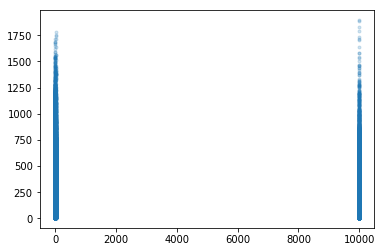

In [2]:
#Data doesn't make sense
data = np.load('omni_1min_2014.npy')
plt.plot( data['bz'], data['ae_index'], '.', alpha=0.2 )
plt.show()

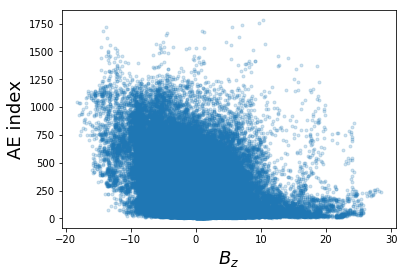

In [3]:
#Certain values are 9999, corresponds to missing value
goodvalues = data['bz'] <= 9000
dat = data[goodvalues]

plt.plot( dat['bz'], dat['ae_index'], '.', alpha=0.2 )
plt.xlabel('$B_z$',fontsize=18)
plt.ylabel('AE index',fontsize=18)
plt.show()

##### Task:

Use tools in scipy.optimize (or elsewhere) to fit a linear model with a single variable 

 $$ AE = c_1 B_z $$

by finding the value of $c_1$ which minimizes the goodness of fit given by 

 $$ \chi^2 = \sum (\mathrm{model} - \mathrm{data})^2 $$

then try two variables

 $$ AE = c_1 B_z + c_2 v_x $$
 
then try a non-linear transformation of a single variable
 
 $$ AE = c_1 B_z + c_2 v_x^2 $$ 
 
then try cross terms 

 $$ AE = c_1 B_z + c_2 v_x + c_3 B_z v_x $$ 
 
then explore combinations and transformations of variables to obtain "the best" model.  Think about what that means.

In [21]:
def fitfunc(param, *args):
    """ optimizers call this function to determine best-fit parameters
       
       args contains
       y: array of values to be fit
       x: dict of arrays of values for model
    """
    
    # unpack arguments and calculate figure-of-merit
    y, x, model = args
    return chi2( y, dat, model, param )

def chi2(y, x, model, param):
    """ difference between model and observations,
        divided by # of points to give number of order 1
    """
    dy = y - model(param, x)
    return np.sum(dy**2) / len(y)

def model_bz(param, x):
    y = param[0] + x['bz'] * param[1]
    return y

yfit = dat['ae_index']
xfit = dat['bz']
scipy.optimize.minimize(fitfunc, [0,1], (yfit, xfit, model_bz) )

      fun: 51071.443061390244
 hess_inv: array([[1, 0],
       [0, 1]])
      jac: array([0., 0.])
  message: 'Optimization terminated successfully.'
     nfev: 8
      nit: 1
     njev: 2
   status: 0
  success: True
        x: array([1.01, 1.  ])

In [14]:
def linfit(c,dat):
    
    return c[0]*dat['bz']+c[1]

fun = lambda c: np.sum( ( dat['ae_index']-linfit(c,dat) )**2 )/len(dat)


opt = scipy.optimize.minimize(fun,[-100,-100])['x']
print(opt)

[-100. -100.]


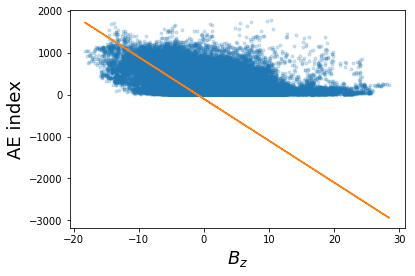

In [12]:
plt.plot( dat['bz'], dat['ae_index'], '.', alpha=0.2 )
plt.plot( dat['bz'], linfit([c1,c2],dat))

plt.xlabel('$B_z$',fontsize=18)
plt.ylabel('AE index',fontsize=18)
plt.show()

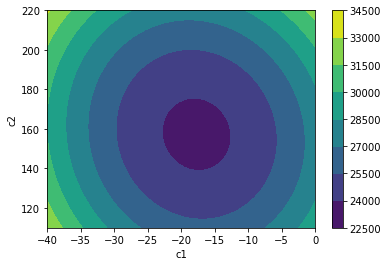

In [8]:
c1 = np.linspace(-40,0,50)
c2 = np.linspace(110,220,50)

chi2 = np.zeros((len(c1),len(c2)))    


for j in range(len(c1)):
    for k in range(len(c2)):
        
        chi2[j][k] = fun([c1[j],c2[k]])
        
plt.contourf(c1,c2,chi2.T)
plt.colorbar()
plt.xlabel('c1')
plt.ylabel('c2')

plt.show()